# Models testing

In [5]:
import matplotlib.pyplot as plt
import joblib
import os
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error, median_absolute_error, PredictionErrorDisplay


if not os.path.exists("images"):
    os.mkdir("images")

#testing = pd.read_pickle("data/testing_df.pkl")
testing = pd.read_csv("data/testing_df.csv")
testing.drop(columns=testing.columns[0], axis=1,  inplace=True)
testing = testing.loc[testing["price"]< 1000, :]
train_set, test_set = train_test_split(testing, test_size=0.2, random_state=874631)
X_train = train_set.drop(["price"], axis=1)
X_test = test_set.drop(["price"], axis=1)
y_train = train_set["price"]
y_test = test_set["price"]



In [6]:
testing.shape

(62808, 59)

In [7]:
testing.head()

,host_id,host_response_rate,host_acceptance_rate,price,host_since,first_review,last_review,host_location,host_response_time,host_is_superhost,...,amenities_long-term-stays,amenities_pets-allowed,amenities_bathtube,amenities_bbq-grill,amenities_lake-bay-view,description_word_count,description_sentiment_polarity,description_sentiment_subjectivity,beds_for_bedroom,scraping_date
0,380378,100.0,100.0,122.0,2011-02-07,2010-06-23,2024-06-08,0.857548,within an hour,0.0,...,0,0,0,0,0,38,0.122619,0.408482,1.0,2024-06-29
1,99235,100.0,50.0,95.0,2010-03-26,2010-09-26,2023-10-09,1.976853,within an hour,0.0,...,0,0,0,0,0,7,0.000000,0.000000,1.0,2024-06-29
2,13925330,100.0,67.0,109.0,2014-04-05,2010-06-17,2023-12-06,0.992744,within a day,1.0,...,1,0,0,0,0,0,0.000000,0.000000,2.0,2024-06-29
3,167739,100.0,62.0,104.0,2010-07-15,2010-09-07,2024-05-15,0.654212,within a few hours,0.0,...,0,0,0,0,0,42,0.262857,0.472381,1.0,2024-06-29
4,167739,100.0,62.0,121.0,2010-07-15,2010-12-17,2024-04-08,0.654212,within a few hours,0.0,...,0,0,0,0,0,41,0.219048,0.456151,2.0,2024-06-29



## Multi Layer Perceptron Regression


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Explained variance score is 0.5134628585995351 
Mean Absolute Error is 47.54385273466445 
Mean Absolute Percentage error is 31.67% 
Median Absolute Error is 27.46676348827949 
Mean Squared Error is 6652.305036449934 
R^2 Error is 0.5127831841274457


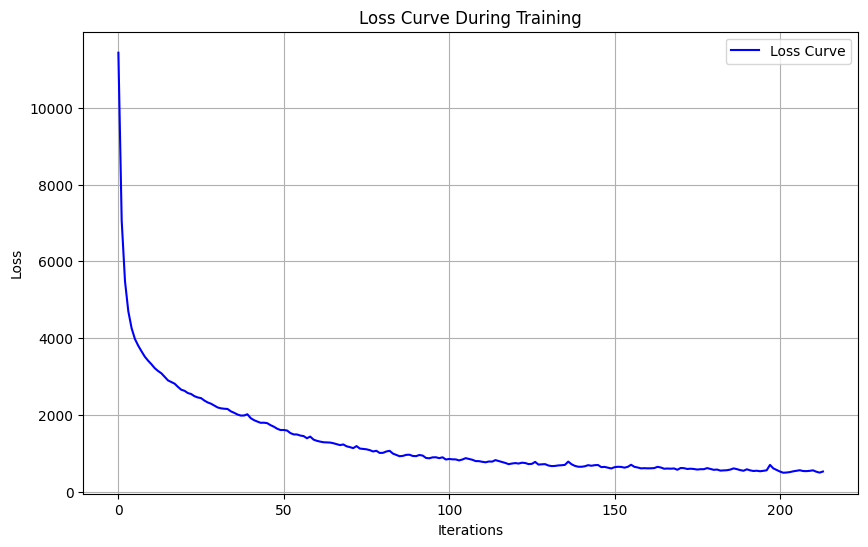

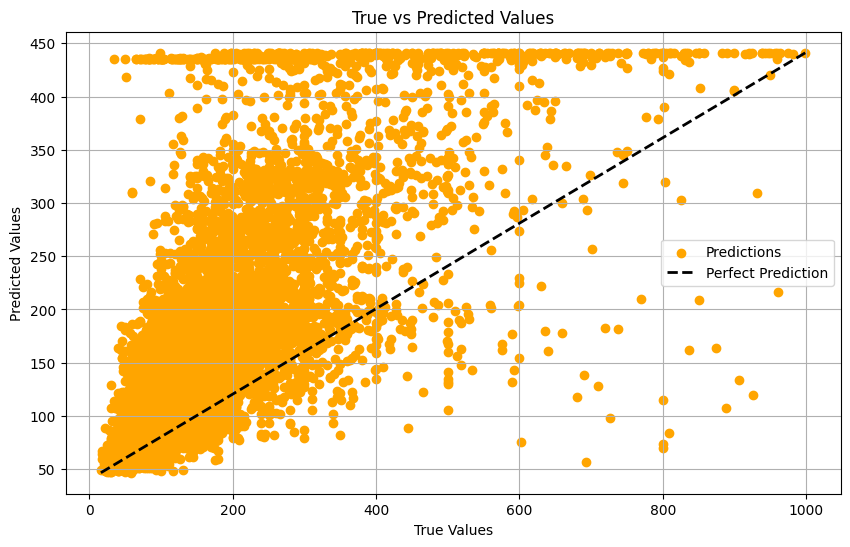

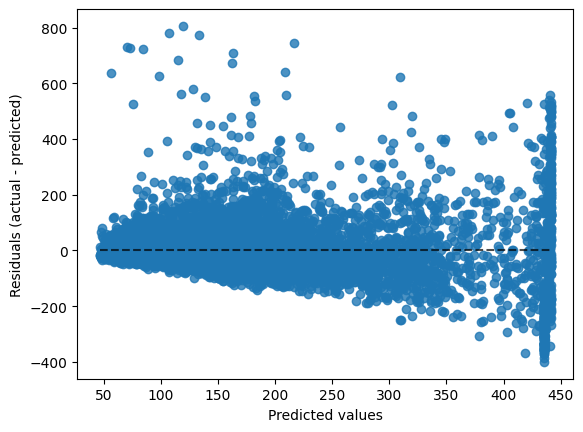

In [8]:
best_pipe = joblib.load("pickle/MLPR_less1k.pkl")
pred = best_pipe.predict(X_test)
print(
    f"\nExplained variance score is {explained_variance_score(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Error is {mean_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Percentage error is {round(100 * mean_absolute_percentage_error(y_true=y_test, y_pred=pred), 2)}%",
    f"\nMedian Absolute Error is {median_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Squared Error is {mean_squared_error(y_true=y_test, y_pred=pred)}",
    f"\nR^2 Error is {r2_score(y_true=y_test, y_pred=pred)}",
)
results = pd.DataFrame(data={"Pred": pred, "y_test": y_test})
results["Difference"] = abs(results["Pred"] - results["y_test"])

plt.figure(figsize=(10, 6))
plt.plot(best_pipe["Model"].loss_curve_, label='Loss Curve', color='blue')
plt.title('Loss Curve During Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='orange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [pred.min(), pred.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

display = PredictionErrorDisplay(y_true=y_test, y_pred=pred)
display.plot()
plt.show()


## Random Forest Regression


Explained variance score is 0.8605275549243574 
Mean Absolute Error is 24.268638486440594 
Mean Absolute Percentage error is 17.07% 
Median Absolute Error is 13.186666666666667 
Mean Squared Error is 1910.316155995153 
R^2 Error is 0.8600878718377963


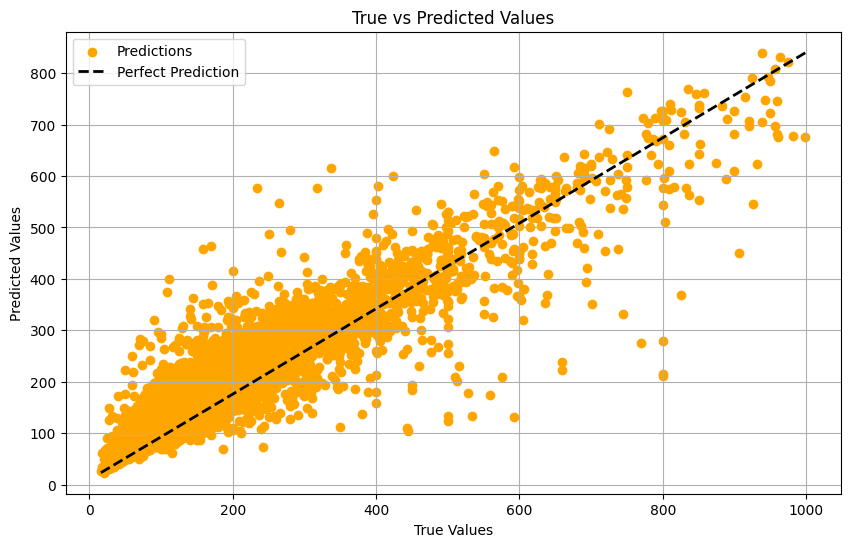

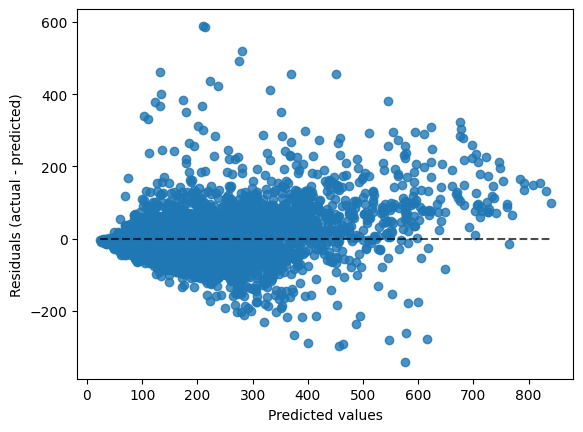

In [9]:
best_pipe = joblib.load("pickle/RFR.pkl")
pred = best_pipe.predict(X_test)
print(
    f"\nExplained variance score is {explained_variance_score(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Error is {mean_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Percentage error is {round(100 * mean_absolute_percentage_error(y_true=y_test, y_pred=pred), 2)}%",
    f"\nMedian Absolute Error is {median_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Squared Error is {mean_squared_error(y_true=y_test, y_pred=pred)}",
    f"\nR^2 Error is {r2_score(y_true=y_test, y_pred=pred)}",
)
results = pd.DataFrame(data={"Pred": pred, "y_test": y_test})
results["Difference"] = abs(results["Pred"] - results["y_test"])
sum(results["Difference"] > 100) / results.shape[0]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='orange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [pred.min(), pred.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

display = PredictionErrorDisplay(y_true=y_test, y_pred=pred)
display.plot()
plt.show()



## Linear Support Vector Regression


Explained variance score is 0.41860275937926816 
Mean Absolute Error is 51.7665451620759 
Mean Absolute Percentage error is 33.53% 
Median Absolute Error is 30.932555310707173 
Mean Squared Error is 8256.647970130236 
R^2 Error is 0.39528062652787843


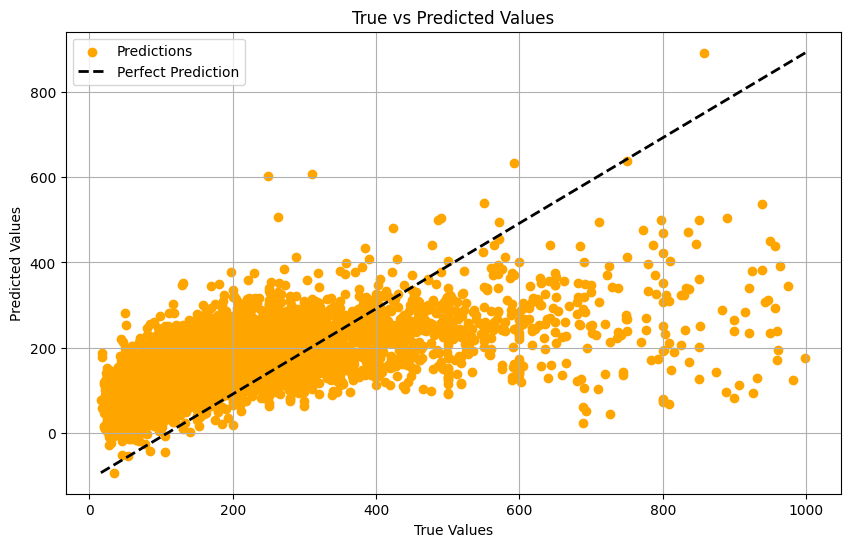

<Figure size 640x480 with 0 Axes>

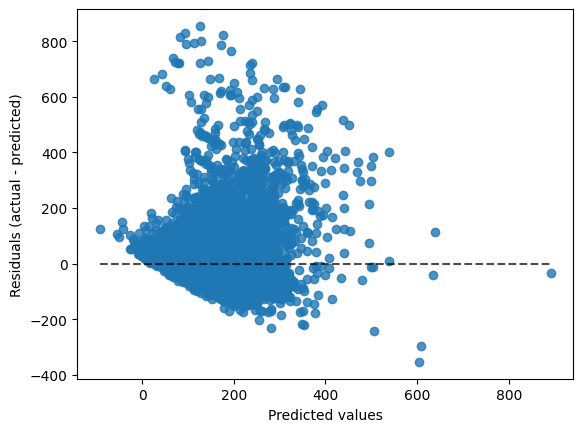

<Figure size 640x480 with 0 Axes>

In [10]:
best_pipe = joblib.load("pickle/LinearSVR.pkl")
pred = best_pipe.predict(X_test)
print(
    f"\nExplained variance score is {explained_variance_score(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Error is {mean_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Percentage error is {round(100 * mean_absolute_percentage_error(y_true=y_test, y_pred=pred), 2)}%",
    f"\nMedian Absolute Error is {median_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Squared Error is {mean_squared_error(y_true=y_test, y_pred=pred)}",
    f"\nR^2 Error is {r2_score(y_true=y_test, y_pred=pred)}",
)
results = pd.DataFrame(data={"Pred": pred, "y_test": y_test})
results["Difference"] = abs(results["Pred"] - results["y_test"])
sum(results["Difference"] > 100) / results.shape[0]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='orange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [pred.min(), pred.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()
plt.savefig('images/LinearSVR_true_vs_pred.png', format='png')

display = PredictionErrorDisplay(y_true=y_test, y_pred=pred)
display.plot()
plt.show()
plt.savefig('images/LinearSVR_residuals.png', format='png')



## Nu Support Vector Regression


Explained variance score is 0.2538702860009654 
Mean Absolute Error is 60.36822963894472 
Mean Absolute Percentage error is 44.87% 
Median Absolute Error is 38.321115343959384 
Mean Squared Error is 10377.215031334377 
R^2 Error is 0.23996965901465905


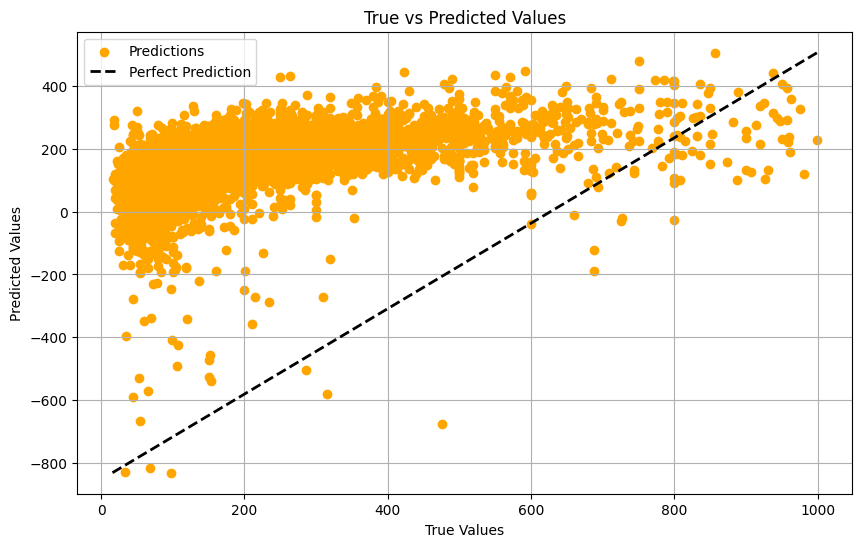

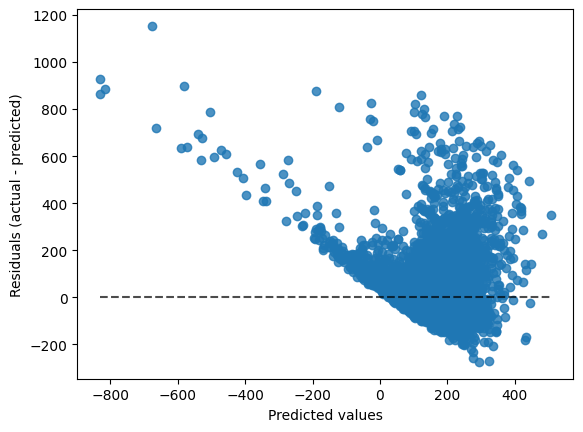

In [11]:
best_pipe = joblib.load("pickle/NuSVR.pkl")
pred = best_pipe.predict(X_test)
print(
    f"\nExplained variance score is {explained_variance_score(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Error is {mean_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Percentage error is {round(100 * mean_absolute_percentage_error(y_true=y_test, y_pred=pred), 2)}%",
    f"\nMedian Absolute Error is {median_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Squared Error is {mean_squared_error(y_true=y_test, y_pred=pred)}",
    f"\nR^2 Error is {r2_score(y_true=y_test, y_pred=pred)}",
)
results = pd.DataFrame(data={"Pred": pred, "y_test": y_test})
results["Difference"] = abs(results["Pred"] - results["y_test"])
sum(results["Difference"] > 100) / results.shape[0]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='orange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [pred.min(), pred.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

display = PredictionErrorDisplay(y_true=y_test, y_pred=pred)
display.plot()
plt.show()



## KNN Regression


Explained variance score is 0.5065878725087869 
Mean Absolute Error is 50.22654035981532 
Mean Absolute Percentage error is 35.97% 
Median Absolute Error is 31.899999999999977 
Mean Squared Error is 6738.313728705621 
R^2 Error is 0.5064838817129339


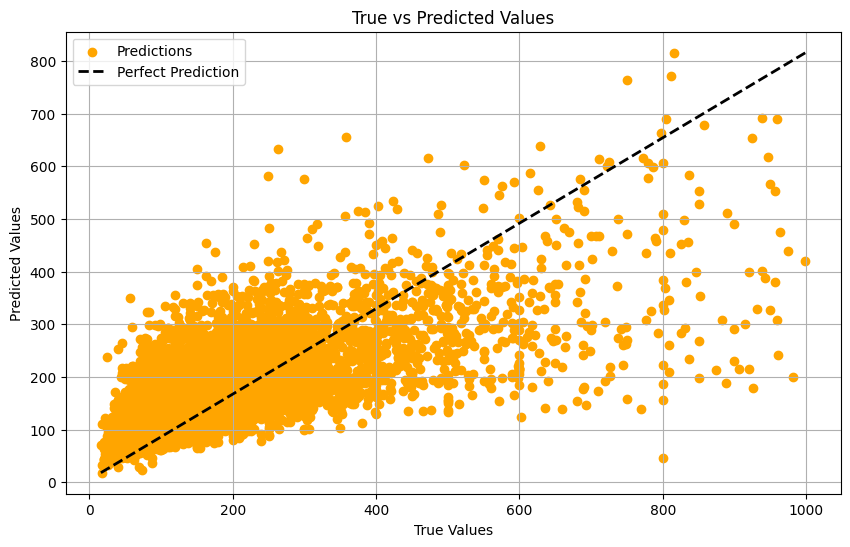

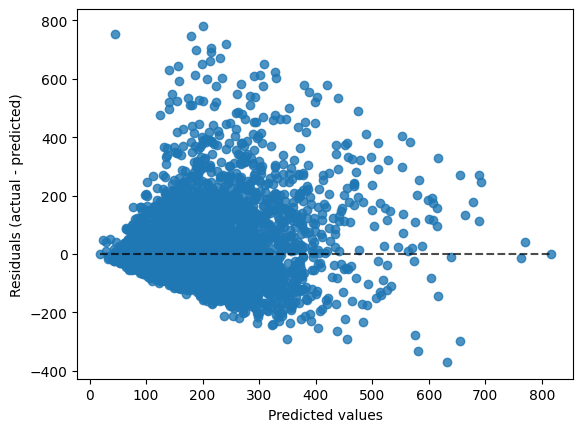

In [12]:
best_pipe = joblib.load("pickle/KNNR.pkl")
pred = best_pipe.predict(X_test)
print(
    f"\nExplained variance score is {explained_variance_score(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Error is {mean_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Absolute Percentage error is {round(100 * mean_absolute_percentage_error(y_true=y_test, y_pred=pred), 2)}%",
    f"\nMedian Absolute Error is {median_absolute_error(y_true=y_test, y_pred=pred)}",
    f"\nMean Squared Error is {mean_squared_error(y_true=y_test, y_pred=pred)}",
    f"\nR^2 Error is {r2_score(y_true=y_test, y_pred=pred)}",
)
results = pd.DataFrame(data={"Pred": pred, "y_test": y_test})
results["Difference"] = abs(results["Pred"] - results["y_test"])
sum(results["Difference"] > 100) / results.shape[0]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='orange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [pred.min(), pred.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

display = PredictionErrorDisplay(y_true=y_test, y_pred=pred)
display.plot()
plt.show()
